<a href="https://colab.research.google.com/github/keizikang/self_study_mldl/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_3%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3장: 회귀 알고리즘과 모델 규제: 농어의 무게를 예측하라!

---

## 3-1 k-최근접 이웃 회귀

---

지난번까지 했던 건 길이와 무게로부터 분류Classify 하는 것

즉, 주어진 특성값feature으로부터 class를 찾아가는 것

이번에 할 것은 특성값으로 다른 특성값을 유추하는 것 -> 회귀

---
  * **k-최근접 이웃 분류: 비슷한 것들끼리는 비슷한 특성값을 가질 것이다.**
    * 예: 도미끼리는 특성값(길이, 무게)이 비슷할 것이다.
    * 분류이므로 결과값은 이산값임
  * **k-최근접 이웃 회귀: 비슷한 것들끼리는 특성값의 관계도 비슷할 것이다.**
    * 예: 길이가 비슷한 농어들은 무게도 비슷할 것이다.
    * 회귀이므로 결과값은 연속값임

---
훈련 데이터로 농어perch의 길이와 무게 56개가 있음

새로운 길이가 들어왔을 때 무게를 추정하고자 함

우선 데이터 확인하고 훈련/테스트 세트를 나누고 그래프로 확인

---

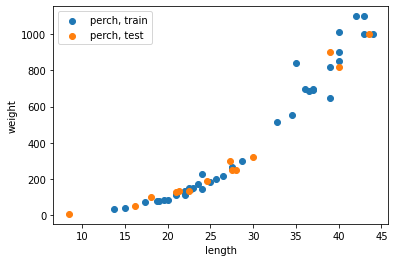

In [13]:
import numpy as np

# perch data from bit.ly/perch_data
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

import matplotlib.pyplot as plt

plt.scatter(train_input, train_target, label='perch, train')
plt.scatter(test_input, test_target, label='perch, test')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

---

k-최근접 이웃 회귀 알고리즘은 사이킷런의 KNeighborsRegressor 클래스를 이용함

훈련시키기 전에 할 게 있음

사이킷런은 샘플이 첫 번째 차원을 따라 놓여있는 것으로 받아들임 said [저자](https://groups.google.com/g/ml-dl-book-qna/c/bOgyl1D8pyY)

참고 (중요): [KNeighborsRegressor.fit(X, y)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.fit)
 
fit(X, y)

Parameters

X: Training data of shape (n_samples, n_features)

y: Target values of shape (n_samples,)


---

In [14]:
# 사이킷런에 입력하는 훈련 세트는 행 방향으로 각 샘플이 들어감
# 즉, 훈련 세트의 행 개수가 샘플 개수와 같아야 함
# numpy의 reshape을 이용해서 해결

train_input = train_input.reshape(-1, 1) # (42, 1)이 됨
test_input = test_input.reshape(-1, 1) # (14, 1)이 됨

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.992809406101064

---

knr.score가 반환하는 값은 결정계수coefficient of determination

R<sup>2</sup>라고도 부르며 계산식은 아래와 같음

$ R^2 = 1 - {{\Sigma(타겟-예측)^2} \over {\Sigma(타겟-타겟평균)^2}} = 1 - {{||타겟-예측||^2} \over {||타겟-타겟평균||^2}} $


타겟과 예측이 일치하면 R<sup>2</sup>=1이 됨

예측이 아주 많이 이상하면 R<sup>2</sup>는 음수가 될 수 있음

아래 코드는 R<sup>2</sup>를 직접 계산해본 것

knr.score()의 결과와 동일함을 알 수 있음

---

In [15]:
prediction = knr.predict(test_input)

num = np.linalg.norm(test_target - prediction)**2
den = np.linalg.norm(test_target - np.mean(test_target))**2

print(1 - num/den)

0.992809406101064


---

knr.score()에 train_input과 train_target을 넣으면 R<sup>2</sup>가 1이 나올까?

안 나옴. knr.n_neighbors가 5이기 때문

---


In [16]:
knr.score(train_input, train_target)

0.9698823289099254

---

knr.n_neighbors를 1로 바꾸면 자기 자신만 이용해서 예측한 거니까

R<sup>2</sup>가 1이 나와야 할까?

---

In [17]:
knr.n_neighbors = 1
knr.score(train_input, train_target)

0.9852830341215901

---

이것도 1이 안나옴

예를 들어 지금 train_input에는 길이 22짜리 농어가 5마리 있음

(무게 135, 120, 130, 110, 120)

이제 새 입력으로 22가 들어가면

같은 입력에 타겟이 5개 있으므로 이 중 뭘 쓸지 알 수 없음

확실하진 않지만 가장 앞의 값을 쓰는것 같음 (135)

---

In [18]:
# train_input 중 길이 22인 것들만 골라냄
idx = np.where(train_input == 22)[0]
print(np.hstack((train_input[idx, :], train_target[idx].reshape(-1, 1))))
knr.predict([[22]])

[[ 22. 135.]
 [ 22. 120.]
 [ 22. 130.]
 [ 22. 110.]
 [ 22. 120.]]


array([135.])

---

n_neighbors를 5로 했을 때 길이 22에 대한 predict() 결과는

훈련 세트의 길이 22에 해당하는 무게 135, 120, 130, 110, 120의 평균인 123임

n_neighbors를 2로 했을 때 [135, 120]의 평균이 나오고

n_neighbors를 3으로 했을 때 [135, 120, 130]의 평균이 나오는걸 봐서는

겹치는 게 있으면 앞에서부터 샘플을 가져오는 것 같음


---

In [19]:
knr.n_neighbors = 5
knr.predict([[22]])

array([123.])

---

그래프를 보면 테스트 샘플 중 유독 짧고 가벼운 샘플이 있음

테스트 샘플 0번째로, 길이 8.4, 무게 5.9임

이 농어와 가까운 5마리는 멀리 떨어져 있을 것이므로 

예측하는 무게는 엉뚱한 값이 나올 것임

---

weights of nearests to new: [[32. 40. 70. 78. 80.]]
prediction to shortest perch: [60.]


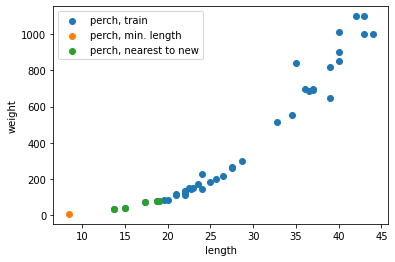

In [28]:
idxmin = np.argmin(test_input)
lenmin = test_input[idxmin]
wgtmin = test_target[idxmin]
_, indexes = knr.kneighbors([lenmin])
print(f'weights of nearests to new: {train_target[indexes]}')
print(f'prediction to shortest perch: {knr.predict([lenmin])}')


plt.scatter(train_input, train_target, label='perch, train')
plt.scatter(lenmin, wgtmin, label='perch, min. length')
plt.scatter(train_input[indexes], train_target[indexes], label='perch, nearest to new')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

---

제일 짧은 농어와 가까운 5마리의 무게는 [32. 40. 70. 78. 80.]임

그래서 이 농어의 무게를 60으로 예측함

실제 무게인 5.9와는 큰 차이를 보임

선형 회귀가 필요함 (좀 나중에 다룰 예정)


---

In [32]:
print(f'훈련 세트 점수:   {knr.score(train_input, train_target)}')
print(f'테스트 세트 점수: {knr.score(test_input, test_target)}')

훈련 세트 점수:   0.9698823289099254
테스트 세트 점수: 0.992809406101064


---

과대적합overfitting: 훈련 세트 점수 >> 테스트 세트 점수인 경우

과소적합underfitting: 훈련 세트 점수 << 테스트 세트 점수, 또는 둘다 낮은 경우

지금 훈련 세트 점수가 0.9698823289099254이고

테스트 세트 점수가 0.992809406101064이므로

과소적합임

과소적합을 해결하는 간단한 방법: n_neighbors를 줄이면 됨

로컬한 값의 변동을 노이즈로 볼거냐 데이터의 특성으로 볼거냐의 차이

데이터의 특성으로 본다면 n_neighbors를 줄이면 되고

그렇게 하면 데이터의 로컬한 변화를 그대로 따라가므로 당연히 훈련 세트의 점수는 낮아짐

3으로 해보자

---

In [39]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)

print(f'훈련 세트 점수:   {knr.score(train_input, train_target)}')
print(f'테스트 세트 점수: {knr.score(test_input, test_target)}')          

훈련 세트 점수:   0.9804899950518966
테스트 세트 점수: 0.9746459963987609


In [ ]:
# Problem 03-1-2

knr = KNeighborsRegressor()

x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)

    prediction = knr.predict(x)
    
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title(f'n_neighbors = {n}')
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

## 3-2. 선형 회귀

앞에서 다뤘던 k-최근접 이웃 회귀는 

비슷한 것들끼리는 특성값의 관계도 비슷할 것이라는 가정을 기반으로 한 방법임

예를 들어 길이가 비슷한 농어들은 무게도 비슷할 것이라고 가정함

---

만약 길이가 비슷한 농어가 없으면 어떻게 될까?

가지고 있는 농어 데이터는 길이 8.4 cm ~ 44.0 cm밖에 없는데

길이 100 cm짜리 농어가 들어오면 어떻게 될까?

100 cm와 비슷한 데이터는 없음

따라서 가장 긴 농어의 데이터를 참고할 수밖에 없고

당연히 큰 오차가 발생함

----

해결방법: 길이와 농어의 관계를 유추할 수 있는 그래프를 찾아내자.

sklearn.linear_model.LinearRegression 이용


---
  * **k-최근접 이웃 분류: 비슷한 것들끼리는 비슷한 특성값을 가질 것이다.**
    * 예: 도미끼리는 특성값(길이, 무게)이 비슷할 것이다.
    * 분류이므로 결과값은 이산값임
  * **k-최근접 이웃 회귀: 비슷한 것들끼리는 특성값의 관계도 비슷할 것이다.**
    * 예: 길이가 비슷한 농어들은 무게도 비슷할 것이다.
    * 회귀이므로 결과값은 연속값임
  * **선형 회귀: 데이터 전체를 잘 표현할 수 있는 하나의 수식을 찾을 수 있을 것이다.**
    * 예: 농어의 무게는 길이의 3차 다항식으로 표현 가능할 것이다.
---

In [ ]:
# 값이 엉뚱하게 나옴을 확인

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

new_fish1_length = 50
new_fish2_length = 100

distances1, indexes1 = knr.kneighbors([[new_fish1_length]])
distances2, indexes2 = knr.kneighbors([[new_fish2_length]])
print(indexes1)
print(indexes2)

plt.scatter(train_input, train_target, label='perch, train')
plt.scatter(train_input[indexes1], train_target[indexes1], marker='D', label='perch, nearest to new1')
plt.scatter(train_input[indexes2], train_target[indexes2], marker='D', label='perch, nearest to new2')
plt.scatter(new_fish1_length, knr.predict([[new_fish1_length]]), marker='^', label='new perch #1')
plt.scatter(new_fish2_length, knr.predict([[new_fish2_length]]), marker='^', label='new perch #2')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

---

sklearn.linear_model.LinearRegression 사용법은 앞에 나왔던 것들과 똑같음

LinearRegression.fit(train_input, train_target)

주어진 데이터를 least square로 fitting함

이걸 실행하면 객체 안에 데이터도 들어가고 계수도 생성됨

fitting 하려는 차수에 따라 train_input을 다르게 만들어줘야 함

1차일 경우: train_input이 그대로 들어감

2차일 경우: (train_input**2, train_input)이 들어감


---


In [ ]:
from sklearn.linear_model import LinearRegression

# 1차
lr1 = LinearRegression()
lr1.fit(train_input, train_target)

print(f'1차 회귀 모델: {lr1.coef_[0]:.3f}x + {lr1.intercept_:.3f}')
# print(f'길이 50cm 농어의 예측 무게: {lr.predict([[50]])}g')
# print(f'길이 100cm 농어의 예측 무게: {lr.predict([[100]])}g')
print(f'\t훈련 세트 점수:   {lr1.score(train_input, train_target)}')
print(f'\t테스트 세트 점수: {lr1.score(test_input, test_target)}')

# 2차
train_poly2 = np.column_stack((train_input**2, train_input))
test_poly2 = np.column_stack((test_input**2, test_input))

lr2 = LinearRegression()
lr2.fit(train_poly2, train_target)

print(f'2차 회귀 모델: {lr2.coef_[0]:.3f}x^2 + {lr2.coef_[1]:.3f}x + {lr2.intercept_:.3f}')
print(f'\t훈련 세트 점수:   {lr2.score(train_poly2, train_target)}')
print(f'\t테스트 세트 점수: {lr2.score(test_poly2, test_target)}')

# 3차
train_poly3 = np.column_stack((train_input**3, train_input**2, train_input))
test_poly3 = np.column_stack((test_input**3, test_input**2, test_input))

lr3 = LinearRegression()
lr3.fit(train_poly3, train_target)

print(f'3차 회귀 모델: {lr3.coef_[0]:.3f}x^3 + {lr3.coef_[1]:.3f}x^2 + {lr3.coef_[2]:.3f}x + {lr3.intercept_:.3f}')
print(f'\t훈련 세트 점수:   {lr3.score(train_poly3, train_target)}')
print(f'\t테스트 세트 점수: {lr3.score(test_poly3, test_target)}')


---

각 차수에 대한 결과를 그려서 비교해보자.

---

In [ ]:
point = np.arange(15, 50).reshape(-1, 1)

plt.scatter(train_input, train_target, label='training data')

plt.plot(point, lr1.predict(point), label='fit-1st order')
plt.plot(point, lr2.predict(np.column_stack((point**2, point))), label='fit-2nd order')
plt.plot(point, lr3.predict(np.column_stack((point**3, point**2, point))), label='fit-3rd order')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import random
x = np.arange(0, 1.1, .1)
y = x ** 2 + np.random.randn(len(x))/100

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

p = np.polyfit(x, y, 1)
print(p)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#train_data = np.column_stack((x ** 2, x))
train_data = x
train_target = y
lr.fit(train_data, train_target)

lr.coef_, lr.intercept_

---

## 3-3. 특성공학과 규제

이왕 하는거 농어의 높이, 두께도 사용하고 싶다.

다변수 다항회귀(aka 다중회귀multiple regression)를 해보자는 것

https://bit.ly/perch_csv_data 에는 [길이, 높이, 두께] 순서로 데이터가 들어있음

---

In [ ]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

---

sklearn.preprocessing.PolynomialFeatures를 사용하면

입력 데이터로 만들 수 있는 모든 단항식의 값을 계산할 수 있다.

예를 들어 변수 x0, x1, x2를 이용하는 3변수 2차 fitting이라면

[x0, x1, x2, x0^2, x0 * x1, x0 * x2, x1^2, x1 * x2, x2^2]

이렇게 만들어진다.

변수가 길이, 높이, 두께, 타겟이 무게라면

이제 다항 회귀로 아래 모델을 만들겠다는 뜻이다.

무게 = c1 x 길이 + c2 x 높이 + c3 x 두께 + c11 x 길이^2 + c12 x 길이 x 높이 + c13 x 길이 x 두께 + c22 x 높이^2 + c23 x 높이 x 두께 + c33 x 두께^2

이제 LinearRegression이 할 일은

train_target과의 MSE가 최소가 되도록 각 column에 곱해줄 계수를 찾는 것이다.

다변수 최소자승법을 생각해보면 됨

---

참고로 사이킷런 모델은 자동으로 상수항을 무시해주는데

그냥 책에 나온 것처럼 명시적으로 include_bias=False로 써주겠음

PolynomialFeatures 같은걸 변환기transformer라고 부름

get_feature_names_out() 메서드를 사용하면 실제로 만들어지는 단항식을 볼 수 있음

---


In [ ]:
# PolynomialFeatures 예시

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))
# [2, 3, 2*2, 2*3, 3*3] 이런 순서로 만들어짐
print(poly.get_feature_names_out())

# 차수의 기본값은 2이며, degree 파라미터로 바꿀 수 있음
poly.degree = 3
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))
# [2, 3, 2*2, 2*3, 3*3, 2*2*2, 2*2*3, 2*3*3, 3*3*3]
print(poly.get_feature_names_out())

---

n변수 k차 fitting을 한다면 poly.transform으로 만들어지는 배열의 크기는 얼마일까?

n+1개의 변수 중 중복 허용하여 k개를 고르는 것이므로 중복조합으로 생각할 수 있다.

n이 아니라 n+1인 이유는 상수항 때문

그리고 최종 상수항은 제외해야 하므로 마지막에 -1을 빼준다.

따라서 n변수 k차 fitting을 위한 poly.transform의 결과 크기는

(N_samples, (n+1)_H_k)가 된다.

예: 3변수 2차 -> 4H2 - 1 = 9
예: 2변수 2차 -> 3H2 - 1 = 5
예: 2변수 3차 -> 3H3 - 1 = 9

---

이제 실제로 농어의 길이, 높이, 두께를 모두 이용해서 회귀모델을 만들어보겠음

---

In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(f'훈련 세트 점수: {lr.score(train_poly, train_target):.3f}')
print(f'테스트 세트 점수: {lr.score(test_poly, test_target):.3f}')

---

여기서 다항식의 차수를 높이면 과적합이 되기 쉬움

과적합의 대표적인 사례 중 하나임

아래 영상 8분 23초부터 나오는 그래프에서

9차 fitting이 overfitting을 잘 보여줌

https://www.youtube.com/watch?v=c8vDSWoJHHA


---

In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(f'훈련 세트 점수: {lr.score(train_poly, train_target):.3f}')
print(f'테스트 세트 점수: {lr.score(test_poly, test_target):.3f}')

---

규제regularization란 과대적합을 방지하기 위해

특성에 곱해지는 계수의 크기를 제한하는 것을 말한다.

![](https://miro.medium.com/max/1400/1*zQu4OjRXu73gVuqDygNRag.png)

출처: https://iamvaibhavsaini.medium.com/what-is-regularization-and-why-regularization-reduces-overfitting-e938282c32a8


위 그림을 보면 가운데 부드러운 곡선이 데이터를 가장 잘 표현한다고 볼 수 있다.

회귀 결과와의 차이는 자연스러운 오차라고 봐야 옳을 것이다.

예를 들어 길이, 높이, 두께가 같은 농어 100마리의 무게가 

한치의 오차도 없이 정확히 같지는 않을 것이다.

실제 무게가 다를 수도 있지만, 측정의 오차도 발생할 수 있다.

오른쪽은 대표적인 과대적합이다.

오차를 오차로 보지 않고 실제 데이터의 특성이라고 본 것이다.

훈련 세트에 억지로 맞춘 것이므로 당연히 훈련 세트의 점수는 높게 나온다.

하지만 (대부분의 경우) 데이터가 진짜로 저렇게 복잡한 모양은 아닐 것이므로

새로운 데이터가 들어오면 점수가 낮아질 가능성이 높다.

---

규제는 두 가지 방법이 있다.

릿지ridge 회귀는 계수의 L2 norm이 특정 값 이하가 되도록 제한한다.

라쏘lasso 회귀는 계수의 L1 norm이 특정 값 이하가 되도록 제한한다.

자세한 내용은 아래 영상을 보자.

https://www.youtube.com/watch?v=MSddyk7Hsxc

---

계수는 특성값의 스케일에도 영향을 받을 것이다.

예를 들어 농어의 길이가 최대 100 cm인데 두께는 최대 2 cm밖에 되지 않는다면

두 특성값에 곱해지는 계수도 스케일이 다를 것이고

공정하게 규제되지 않을 것이다.

이를 위해 사이킷런의 StandardScaler 클래스가 준비되어 있으니 사용하도록 하자.

---

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly) # 표준점수화 된 훈련 세트
test_scaled = ss.transform(test_poly) # 표준점수화 된 테스트 세트

---

릿지 회귀는 sklearn.linear_model.Ridge 클래스를 사용한다.

---

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(f'훈련 세트 점수: {ridge.score(train_scaled, train_target):.3f}')
print(f'테스트 세트 점수: {ridge.score(test_scaled, test_target):.3f}')

---

규제의 강도를 조절할 수 있다.

모델 객체의 alpha 값이 규제의 강도를 조절하는 파라미터이다.

공식 페이지를 보면, 릿지 회귀는 아래 함수를 최소화하는 계수를 찾는다.

* ||y - Xw||^2_2 + alpha * ||w||^2_2
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

따라서 alpha가 1이면 규제 강도가 세지고 계수 값이 저 많이 제한된다.

alpha가 0이면 그냥 선형 회귀랑 똑같아진다.

alpha 값은 모델이 학습해주지 못하고 우리가 직접 정해야 한다.

이렇게 사람이 직접 설정해야 하는 값을 하이퍼파라미터hyperparameter라고 부른다.

반대로 선형 회귀에서 모델이 찾은 coef_, intercept_ 등은 모델 파라미터model parameter라고 부른다.

---

alpha 값을 바꿔가면서 훈련/테스트 세트의 점수를 확인해보고, 적절한 alpha 값을 찾아보자.

---

In [ ]:
alpha_list = np.power(10., range(-3, 3))
train_score = []
test_score = []

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(alpha_list, train_score, label='training data')
plt.plot(alpha_list, test_score, label='test data')
plt.xlabel('alpha')
plt.ylabel('$R^2$')
plt.legend()
plt.gca().set_xscale('log')
plt.show()

